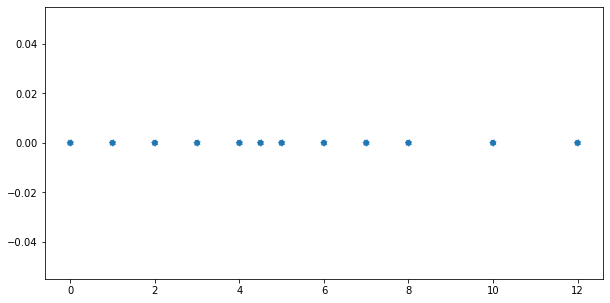

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# initial some points along the line
samples = [0,1,3,4,5,6, 2,4.5,7,8,10,12]
# plot them
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted')
plt.show()

In [2]:
Class0 ~ N(mu1, sigma1)
Class1 ~ N(mu2, sigma2)

SyntaxError: invalid syntax (1263437476.py, line 1)

In [ ]:
N(mu1, sigma1), N(mu2, sigma2)

In [ ]:
mu1, sigma1, mu2, sigma2

In [3]:
mu1=0, sigma1=1, mu=1, sigma=2

SyntaxError: cannot assign to literal (3124662217.py, line 1)

In [4]:
# first initial
mu1 = 0
sigma1 = 1
mu2 = 1
sigma2 = 1
# sample 100000 times from this two initial normal distribution 
samples_1 = np.random.normal(mu1, sigma1, 100000)
samples_2 = np.random.normal(mu2, sigma2, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1, sigma1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2, sigma2).pdf(np.sort(samples_2))
# plot
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted')
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

NameError: name 'scipy' is not defined

In [5]:
# get likelihood for each x from gaussian_1 and gaussian_0
# get likelihood of x in gaussian_1
likelihood_x_gaussian_1 = [1/np.sqrt(2*3.14) * np.exp((-1/2)*(xi**2)) for xi in samples]
# get likelihood of x in gaussian_0
likelihood_x_gaussian_0 = [1/np.sqrt(2*3.14) * np.exp((-1/2)*((xi-1)**2)) for xi in samples]
# create a dataframe 
df_likelihood = pd.DataFrame([samples, likelihood_x_gaussian_1, likelihood_x_gaussian_0]).transpose()
df_likelihood.columns = ['samples', 'p(X=x|class0)', 'p(X=x|class1)']
df_likelihood

,samples,p(X=x|class0),p(X=x|class1)
0,0.0,3.990434e-01,2.420321e-01
1,1.0,2.420321e-01,3.990434e-01
2,3.0,4.432972e-03,5.400466e-02
3,4.0,1.338642e-04,4.432972e-03
4,5.0,1.487097e-06,1.338642e-04
5,6.0,6.077424e-09,1.487097e-06
6,2.0,5.400466e-02,2.420321e-01
7,4.5,1.598779e-05,8.729040e-04
8,7.0,9.137037e-12,6.077424e-09
9,8.0,5.053552e-15,9.137037e-12


In [6]:
p(class0) = p(class1) = 0.5

SyntaxError: cannot assign to function call (3670936527.py, line 1)

In [7]:
Posterior = (likelihood * prior)/Evidence 

NameError: name 'likelihood' is not defined

In [8]:
p(x=0|class0) = 0.399
p(x=0|class1) = 0.242
And 
p(class0) = 0.5
p(class1) = 0.5
Then:
p(class0|x=0) = p(x=0|class0)*p(class0)/(p(x=0|class0)*p(class0) + p(x=0|class1)*p(class1))
= 0.399*0.5 / (0.399*0.5+0.242*0.5)
= 0.622
p(class1|x=0) = p(x=0|class1)*p(class1) /(p(x=0|class0)*p(class0) + p(x=0|class1)*p(class1))
= 0.242*0.5 / (0.399*0.5+0.242*0.5)
= 0.377

SyntaxError: cannot assign to function call (2541320457.py, line 1)

In [10]:
# get likelihood of class0 and class1 occurs given samples
# define prior
prior_class_0 = 0.5
prior_class_1 = 0.5
# get likelihood of gaussian_1 occurs based on x1
df_likelihood['p(class0|x)'] = df_likelihood.apply(lambda row: 
                                                       row["p(X=x|class0)"] * 0.5/(row["p(X=x|class1)"]*0.5+row["p(X=x|class0)"]*0.5),axis =1)
# get likelihood of gaussian_0 occurs based on x1
df_likelihood['p(class1|x)'] = df_likelihood.apply(lambda row: 
                                                       row['p(X=x|class1)'] * 0.5/(row['p(X=x|class1)']*0.5+row['p(X=x|class0)']*0.5), axis=1)


In [11]:
# standardization of p(Gaussian_1|x) and p(Gaussian_0|x)
df_likelihood['p(class0|x)_standardized'] = df_likelihood['p(class0|x)'] / sum(df_likelihood['p(class0|x)'])
df_likelihood['p(class1|x)_standardized'] = df_likelihood['p(class1|x)'] / sum(df_likelihood['p(class1|x)'])

In [ ]:
mu1_new = E(mu1) 
        = sum of (xi * p(class0|X=xi))
        = 0 * 0.43 + 1 * 0.26 + 3 * 0.05 + ....+ 12 * 0.000007
        = 1.08
variance1_new = E(variance) 
           = sum of ((xi - mu1_new)^2 * p(class0| X=xi))
           = (0-1.08)^2*0.47+(1-1.08)^2*0.28+..+(12-1.08)^2*0.000008
           = 1.54
sigma1_new = square_root(variance1_new/N) 
           = square_root(1.54 / 12)
           = 0.34
mu2_new = E(mu2) 
        = sum of (xi * p(Gaussian_0|X=xi)) 
        = 0 * 0.035 + 1 * 0.058 + ... + 12*0.0936 
        = 5.48
variance2_new = E(variance) 
           = sum of ((xi - mu2_new)^2 * p(class1| X=xi))
           = (0-5.49)^2*0.033+(1-5.49)^2*0.053...+(12-5.49)^2*0.086
           = 10.59
sigma1_new = square_root(variance2_new/N) 
           = square_root(10.59 / 12)
           = 0.90

In [ ]:
# update mu1, mu2, sigma1, sigma2
mu1_new = sum(df_likelihood['samples'] * df_likelihood['p(class0|x)_standardized'])
print(mu1_new)
variance1_new = sum((df_likelihood['samples']-mu1_new)**2 * df_likelihood['p(class0|x)_standardized'])
print(variance1_new)
sigma1_new = np.sqrt(variance1_new/len(samples))
print(sigma1_new)
mu2_new = sum(df_likelihood['samples'] * df_likelihood['p(class1|x)_standardized'])
print(mu2_new)
variance2_new = sum((df_likelihood['samples']-mu2_new)**2 * df_likelihood['p(class1|x)_standardized'])
print(variance2_new)
sigma2_new = np.sqrt(variance2_new/len(samples))
print(sigma2_new)

In [ ]:
# finish 1st round
# generate class label if we need a hard assignment
p0 = [scipy.stats.norm(mu1_new,sigma1_new).pdf(x) for x in samples]
p1 = [scipy.stats.norm(mu2_new,sigma2_new).pdf(x) for x in samples]
class_pred= []
for x, y in zip(p0, p1):
    if x < y: 
        class_pred_i = 1
    else:
        class_pred_i = 0
    class_pred.append(class_pred_i)
# sample 100000 times from this two updated normal distribution from initial
samples_1 = np.random.normal(mu1_new, sigma1_new, 100000)
samples_2 = np.random.normal(mu2_new, sigma2_new, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1_new, sigma1_new).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2_new, sigma2_new).pdf(np.sort(samples_2))
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=class_pred)
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

In [ ]:
p(class0) = (0.622 + 0.377 + ... + 0.00001)/13
          = 0.11
p(class1) = 1-p(class0) = 0.89

In [ ]:
# update the prior
prior_class_0 = sum(df_likelihood['p(class0|x)'])/ 13
print(prior_class_0)
prior_class_1 = 1 - prior_class_0
print(prior_class_1)

In [ ]:
p(class_1) = 0.11
p(class_0) = 0.89
mu1 = 1.08
sigma1 = 0.34
mu2 = 5.49
sigma2 = 0.90

In [ ]:
# initial df 
import pandas as pd
# df
label = [1,1,1,1,1,1, 0,0,0,0,0,0,0]
samples = [0,1,3,4,5,6,7, 2,2.5,4.5,8,10,12]
df = pd.DataFrame([samples, label]).transpose()
df.columns = ['samples', 'label']
# ---------------------------------------------------------
# define function 
def expectation_maximization(df,mu1, sigma1, mu2, sigma2, prior_class_1, prior_class_0,max_iteration):
    
    likelihoods = []
    i = 0
    while i <= max_iteration:
        # E step
        # get likelihood of x in class0
        df['p(X=x|class0)'] = [scipy.stats.norm(mu1, sigma1).pdf(x) for x in df.samples]
        # get likelihood of x in class1
        df['p(X=x|class1)'] = [scipy.stats.norm(mu2, sigma2).pdf(x) for x in df.samples]
        
        # get likelihood that need to be maximized 
        likelihood = sum([np.log(x) for x in (prior_class_1*df['p(X=x|class0)']+prior_class_0*df['p(X=x|class1)'])])
        likelihoods.append(likelihood)
        ## get likelihood of class0 given x
        df['p(class0|x)'] = df.apply(lambda row: 
                                         row["p(X=x|class0)"] * prior_class_1/(row["p(X=x|class0)"]*prior_class_1+row["p(X=x|class1)"]*prior_class_1),
                                         axis =1
                                        )
        ## get likelihood of class1 occurs given x
        df['p(class1|x)'] = df.apply(lambda row: 
                                         row['p(X=x|class1)'] * prior_class_0/(row['p(X=x|class0)']*prior_class_0+row['p(X=x|class1)']*prior_class_0),
                                         axis=1
                                        )
        # standardize the likelihood 
        df['p(class0|x)_standardized'] = df['p(class0|x)'] / sum(df['p(class0|x)'])
        df['p(class1|x)_standardized'] = df['p(class1|x)'] / sum(df['p(class1|x)'])
        # M step:
        ## update the parameters by taking expectation 
        mu1 = sum(df['samples'] * df['p(class0|x)_standardized'])
        variance1 = sum((df['samples']-mu1)**2 * df['p(class0|x)_standardized'])
        sigma1 = np.sqrt(variance1_new/df.shape[0])
        mu2 = sum(df['samples'] * df['p(class1|x)_standardized'])
        variance2 = sum((df['samples']-mu2)**2 * df['p(class1|x)_standardized'])
        sigma2 = np.sqrt(variance2_new/df.shape[0])
        # Update prior
        prior_class_1 = sum(df['p(class0|x)'])/ df.shape[0]
        prior_class_0 = sum(df['p(class1|x)'])/ df.shape[0]
        # assign samples into class after updating parameters
        p0 = [scipy.stats.norm(mu1,sigma2).pdf(x) for x in df['samples']]
        p1 = [scipy.stats.norm(mu2,sigma2).pdf(x) for x in df['samples']]
        # predict class for plotting
        class_pred= []
        for x, y in zip(p0, p1):
            if x < y: 
                class_pred_i = 1
            else:
                class_pred_i = 0
            class_pred.append(class_pred_i)
            
        df['class_pred'] = class_pred
        
        i += 1
    
    return mu1, sigma1, mu2, sigma2, likelihoods, df
# ---------------------------------------------------------
# run this function for 10 times 
mu1, sigma1, mu2, sigma2, likelihood, df_final = expectation_maximization(df=df, mu1=0, sigma1=1, mu2=1, sigma2=1, prior_class_1=0.5, prior_class_0=0.5, max_iteration = 10)

In [ ]:
# sample 100000 times from this two updated normal distribution from initial
samples_1 = np.random.normal(mu1, sigma1, 100000)
samples_2 = np.random.normal(mu2, sigma2, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1, sigma1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2, sigma2).pdf(np.sort(samples_2))
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=df_final['class_pred'])
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

In [ ]:
scipy.stats.norm(1.69, 0.34).pdf(5)
scipy.stats.norm(7.05, 0.9).pdf(5)